# Exploring the relationship between gender and policing

Does the gender of a driver have an impact on police behavior during 
a traffic stop? In this chapter, you will explore that question while
practicing __filtering, grouping, method chaining, Boolean math, string
methods, and more!__

# Things Covered:

1) Counting unique values/ Normalizing values

2) Filtering DataFrame rows

3) Comparing stop outcomes for two groups

4) Filtering by multiple conditions

5) Math with Boolean values

6) Comparing groups using groupby

7) Grouping by multiple categories

8) Searching for a string

In [1]:
import pandas as pd
ri = pd.read_csv('./Data/police.csv')
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


### 1) Counting unique values (1)

In [2]:
ri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

### Counting unique values (2)

In [5]:
ri.stop_outcome.value_counts().sum()

86539

In [6]:
ri.shape

(91741, 15)

### Expressing counts as proportions

In [7]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

### 2) Filtering DataFrame rows

In [8]:
ri.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

In [9]:
white = ri[ri.driver_race == 'White']
white.shape

(61872, 15)

### 3) Comparing stop outcomes for two groups

In [10]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [11]:
asian = ri[ri.driver_race == 'Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.923013
Warning             0.045188
Arrest Driver       0.017573
No Action           0.008368
N/D                 0.004184
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

## Does gender affect who gets a ticket for speeding?

### 4) Filtering by multiple conditions (1)

In [12]:
female = ri[ri.driver_gender == 'F']
female.shape

(23774, 15)

### Filtering by multiple conditions (2)

In [13]:
female_and_arrested = ri[(ri.driver_gender == 'F') &
(ri.is_arrested == True)]

In [14]:
female_and_arrested.shape

(669, 15)

### Filtering by multiple conditions (3)

In [15]:
female_or_arrested = ri[(ri.driver_gender == 'F') |
(ri.is_arrested == True)]

In [16]:
female_or_arrested.shape

(26183, 15)

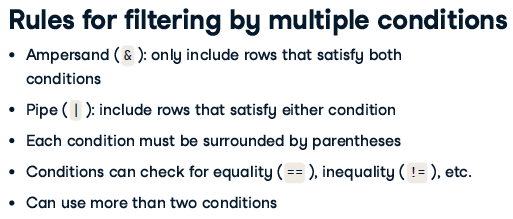

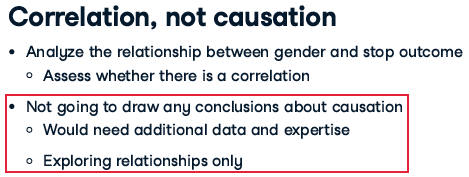

## Does gender affect whose vehicle is searched?

### 5) Math with Boolean values

In [18]:
ri.isnull().sum().head()

state                0
stop_date            0
stop_time            0
county_name      91741
driver_gender     5205
dtype: int64

In [19]:
import numpy as np
np.mean([0, 1, 0, 0])

0.25

In [22]:
np.mean([False, True, False, False])

# Note: Mean of Boolean Series represents percentage of True values

0.25

### Taking the mean of a Boolean Series

In [23]:
ri.is_arrested.value_counts(normalize=True)

False    0.964432
True     0.035568
Name: is_arrested, dtype: float64

In [24]:
ri.is_arrested.dtype

dtype('O')

### 6) Comparing groups using groupby (1)

In [25]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [26]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024346149210558034

### Comparing groups using groupby (2)

In [27]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [28]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024346
Zone K2    0.030801
Zone K3    0.032308
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

### 7) Grouping by multiple categories

In [30]:
ri.groupby(['district', 'driver_gender']).is_arrested.mean().head()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
Name: is_arrested, dtype: float64

## Does gender affect who is frisked during a search?

In [31]:
ri.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [33]:
ri.search_type.value_counts(dropna=False).head()

NaN                     88434
Incident to Arrest       1290
Probable Cause            924
Inventory                 219
Reasonable Suspicion      214
Name: search_type, dtype: int64

### Examining the search types

In [35]:
ri.search_type.value_counts().head()

Incident to Arrest      1290
Probable Cause           924
Inventory                219
Reasonable Suspicion     214
Protective Frisk         164
Name: search_type, dtype: int64

### Searching for a string (1)

In [36]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

### Searching for a string (2)

In [37]:
ri.inventory.dtype

dtype('bool')

In [38]:
ri.inventory.sum()

441

### 8) Calculating the inventory rate

In [39]:
ri.inventory.mean()

0.0048070110419550695

In [40]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264